In [13]:
from google.colab import files
uploaded = files.upload()

Saving final_enriched_airport_dataset.csv to final_enriched_airport_dataset (1).csv


In [15]:
from google.colab import files
uploaded = files.upload()

Saving weather_meteo_by_airport.csv to weather_meteo_by_airport (2).csv


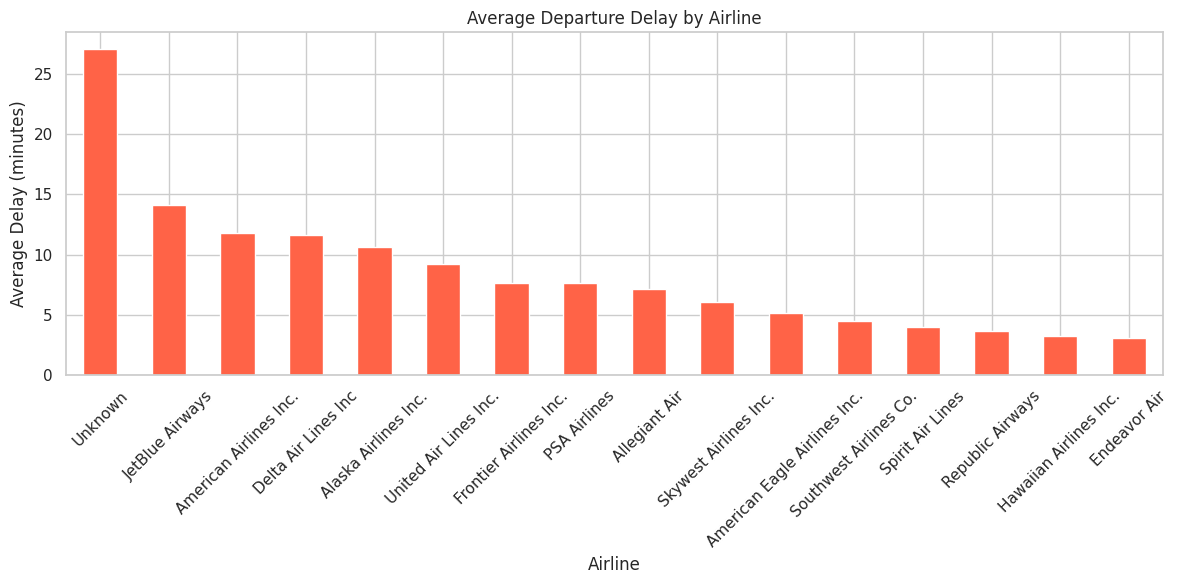

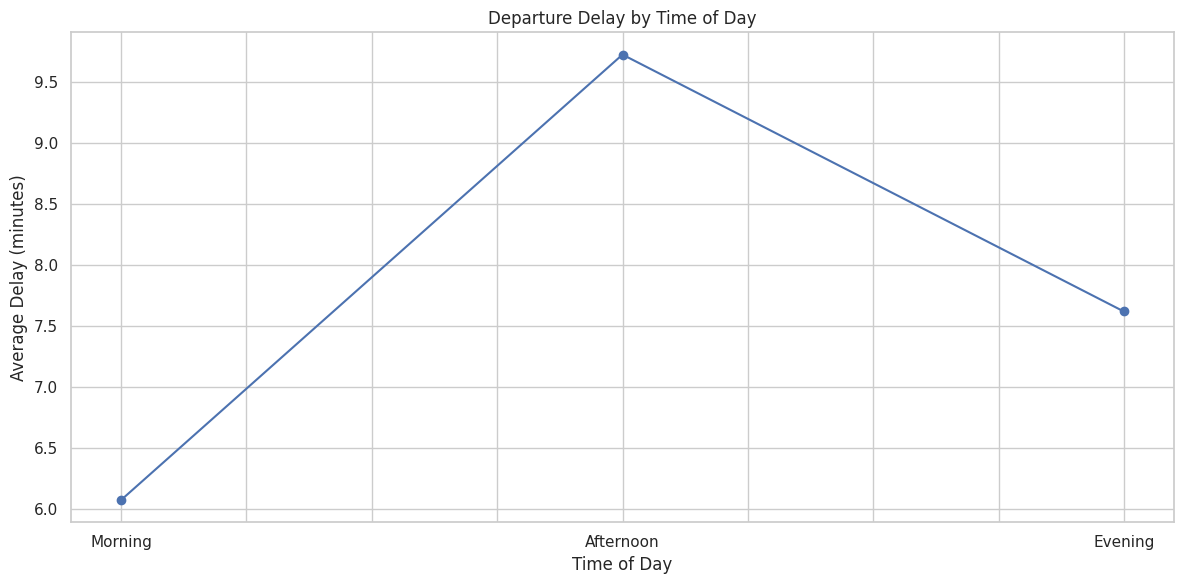

<ipython-input-18-ad19bd121472>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_delay.values, y=city_delay.index, palette="rocket")


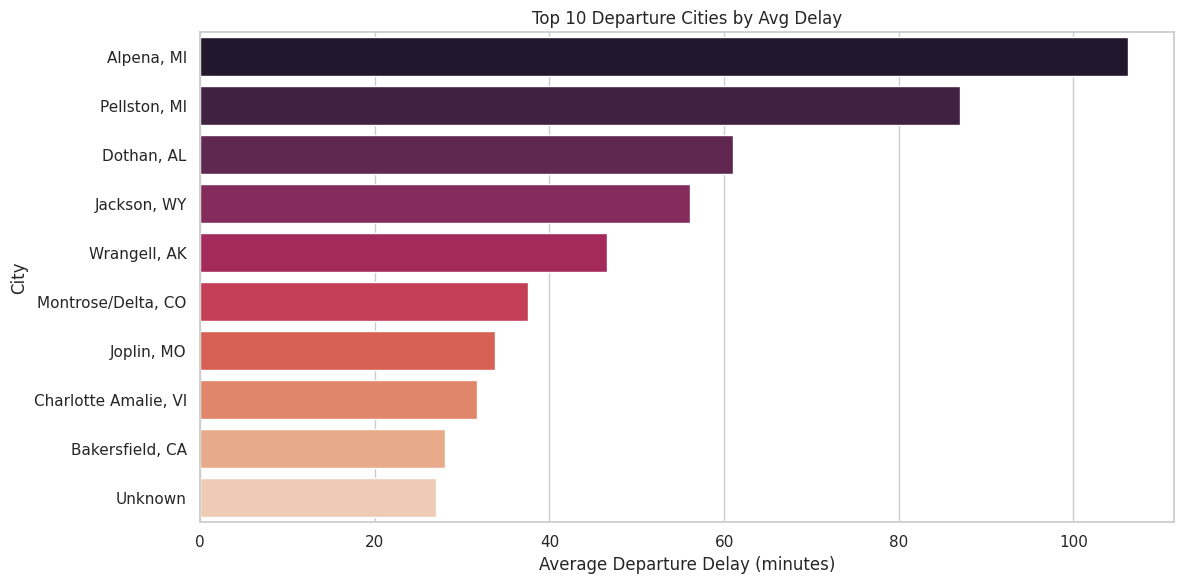

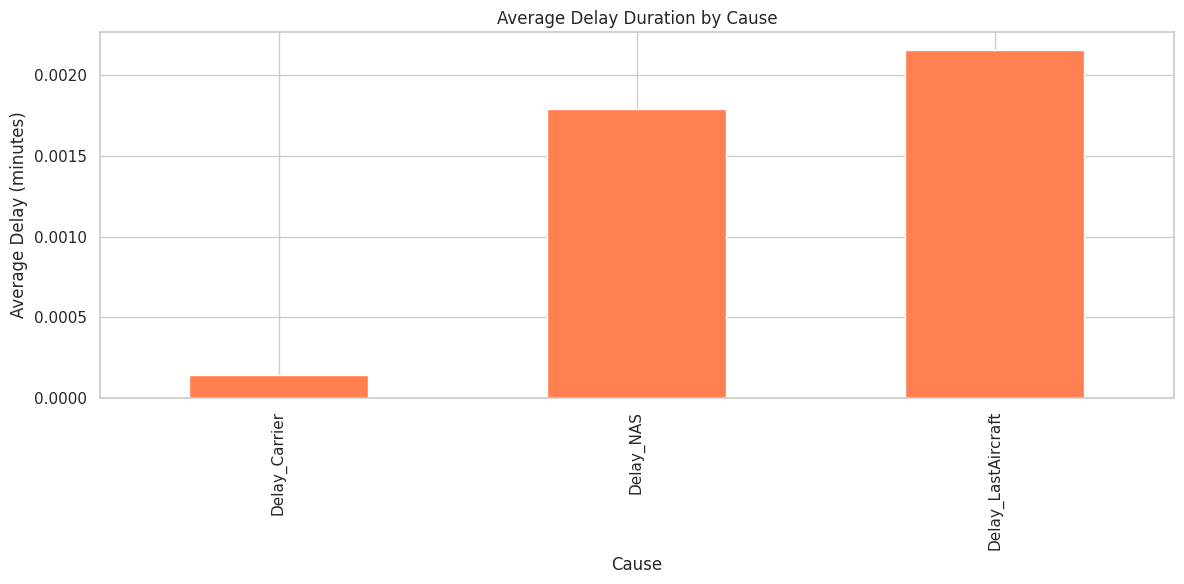

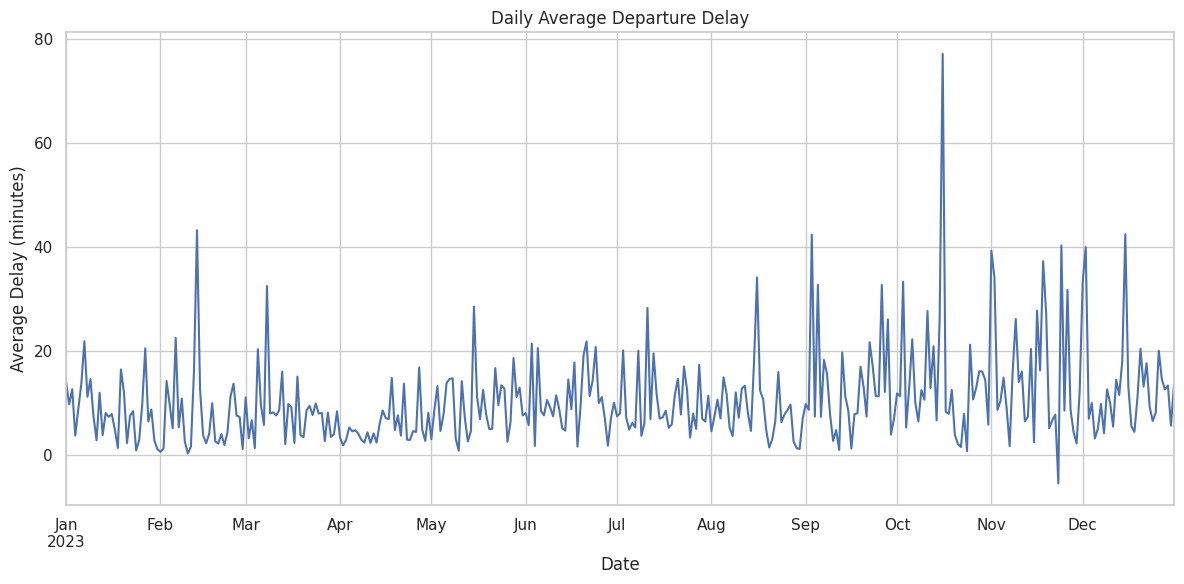

<ipython-input-18-ad19bd121472>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Distance_type", y="Dep_Delay", palette="Set3")


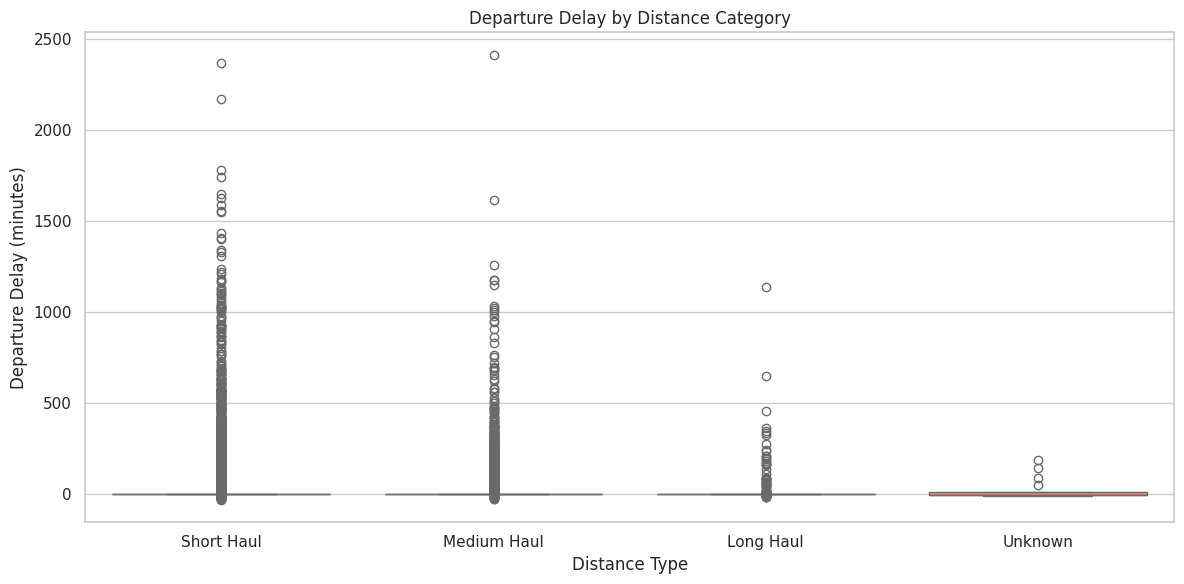

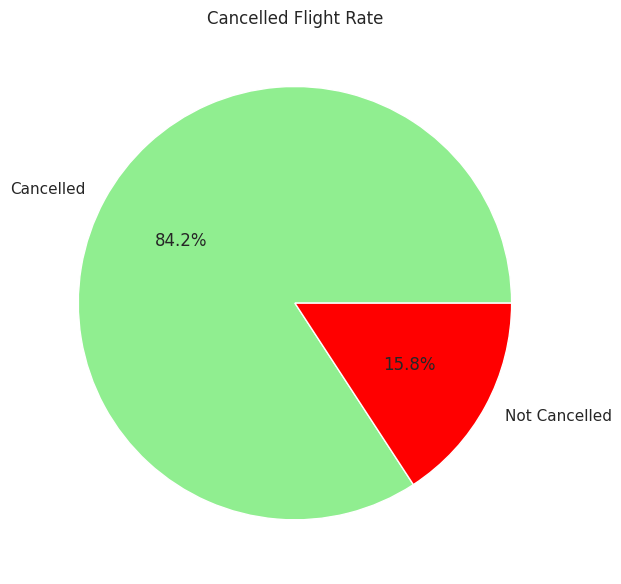

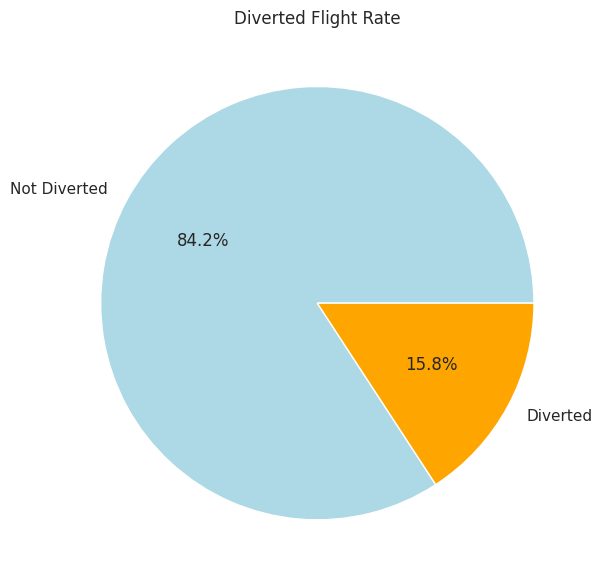

<ipython-input-18-ad19bd121472>:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_heavy_rain_airports.values, y=top_heavy_rain_airports.index, palette="magma")


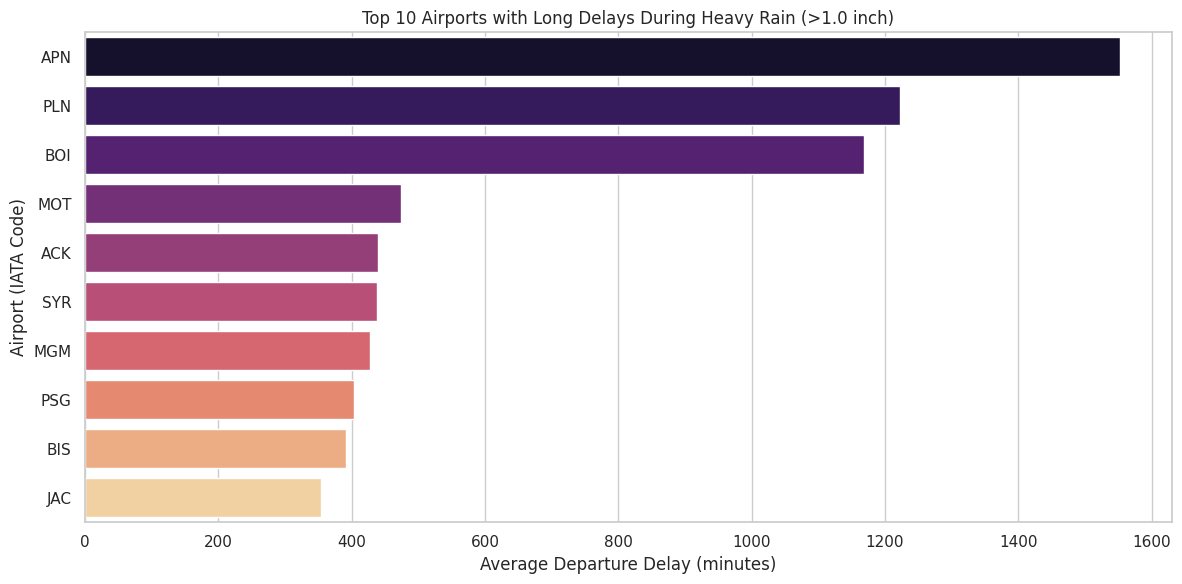

<ipython-input-18-ad19bd121472>:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_delay = df.groupby("Precip_Bin")["Dep_Delay"].mean().dropna()
<ipython-input-18-ad19bd121472>:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_delay.index, y=bin_delay.values, palette="viridis")


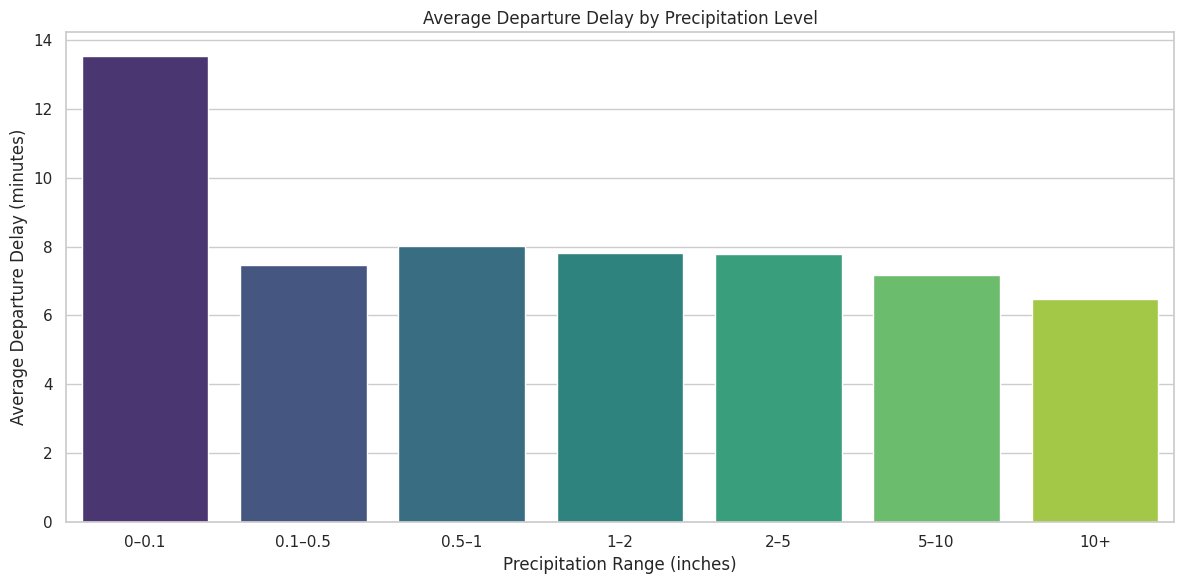

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ayarlar
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Veri setlerini yükle
df = pd.read_csv("final_enriched_airport_dataset.csv")
weather = pd.read_csv("weather_meteo_by_airport.csv")

# 2. Zaman ve havaalanı eşlemesi
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')
weather['FlightDate'] = pd.to_datetime(weather['time'], errors='coerce')
weather = weather.rename(columns={'airport_id': 'IATA_CODE', 'prcp': 'Precipitation'})

# 3. Merge işlemi (hava durumu ekleniyor)
df = pd.merge(df, weather[['FlightDate', 'IATA_CODE', 'Precipitation']],
              on=['FlightDate', 'IATA_CODE'], how='left')

# -----------------------------------------------
# 1. Ortalama kalkış gecikmeleri - Havayolu bazlı
airline_delay = df.groupby("Airline")["Dep_Delay"].mean().sort_values(ascending=False)
airline_delay.plot(kind='bar', color='tomato', title="Average Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#This bar chart illustrates the mean departure delays across various commercial airlines.
#The discrepancies observed among airlines may reflect structural differences in their operations,
#such as hub location density, aircraft turnaround strategies, and frequency of routes in congested
#airspaces. Airlines exhibiting higher average delays may be operating in regions prone to adverse
#weather or infrastructural limitations, while those with lower averages may benefit from operational
#efficiency or predominance in less congested corridors. The chart thus provides insight not only into
#punctuality but also into the underlying geographical and operational context of airline performance.

# 2. Günün saatine göre gecikme
time_label_order = ["Early Morning", "Morning", "Afternoon", "Evening", "Late Night"]
time_label_delay = df.groupby("DepTime_label")["Dep_Delay"].mean().reindex(time_label_order)
time_label_delay.plot(kind='line', marker='o', title="Departure Delay by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


#The line graph presents the temporal distribution of average departure delays across different times of day.
#Notably, delays tend to escalate from morning to evening hours, with the most substantial delays observed during
#the late-night period. This trend is indicative of the compounding effect of cumulative delays throughout the day,
#where early disruptions propagate through successive flights due to limited buffer times. Morning flights, conversely,
#generally experience minimal delays, as they benefit from operational resets during overnight ground time.
#This visualization emphasizes the temporal sensitivity of air traffic flow and highlights the importance of scheduling
#in mitigating delay propagation.


# 3. En çok gecikme yaşayan şehirler
city_delay = df.groupby("Dep_CityName")["Dep_Delay"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_delay.values, y=city_delay.index, palette="rocket")
plt.title("Top 10 Departure Cities by Avg Delay")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

#This bar chart identifies the top ten cities with the highest average departure delays.
#These cities are likely characterized by high flight volumes, infrastructural bottlenecks,
#or exposure to frequent meteorological disturbances. In many cases, major metropolitan hubs
#tend to experience recurrent congestion, leading to increased departure times.
#This visualization is particularly valuable for policymakers and airport authorities as it points
#to critical nodes in the national airspace system where infrastructural investments or operational
#reforms may yield significant improvements in punctuality.



# 4. Gecikme nedenleri - sadece dolu olanları çiz
delay_causes = ["Delay_Carrier", "Delay_Weather", "Delay_NAS", "Delay_Security", "Delay_LastAircraft"]
existing_causes = [col for col in delay_causes if col in df.columns and df[col].notna().any()]
avg_delay_causes = df[existing_causes].mean()
avg_delay_causes = avg_delay_causes[avg_delay_causes > 0]

if not avg_delay_causes.empty:
    avg_delay_causes.plot(kind='bar', color='coral', title="Average Delay Duration by Cause")
    plt.xlabel("Cause")
    plt.ylabel("Average Delay (minutes)")
    plt.tight_layout()
    plt.show()
else:
    print("Uygun gecikme nedenleri verisi bulunamadı.")


#The bar chart categorizes average delay durations according to their underlying causes—carrier,
#weather, National Airspace System (NAS), security, and late-arriving aircraft.
#Among these, delays caused by the late arrival of previous aircraft and NAS-related issues dominate.
#These findings underscore the interconnected nature of air traffic operations, where delays in one
#flight often cascade into subsequent ones. The relative scarcity of weather and security-induced
#delays may suggest either effective mitigation protocols or underreporting.
#Overall, this decomposition allows for targeted analysis and informs stakeholders
#where interventions could be most impactful.




# 5. Günlük ortalama gecikme eğilimi
daily_delay = df.groupby("FlightDate")["Dep_Delay"].mean()
daily_delay.plot(title="Daily Average Departure Delay")
plt.xlabel("Date")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
plt.show()

#This time series chart illustrates how average departure delays fluctuate on a daily basis.
#Observable peaks and troughs suggest the influence of both recurring operational patterns and
#isolated disruptions. Sudden spikes may correspond to adverse weather events, air traffic
#control constraints, or scheduling bottlenecks. The chart highlights the temporal volatility
#of airport punctuality and suggests that mitigation strategies should account for both seasonal
#and short-term variability.


# 6. Mesafe türüne göre gecikme (boxplot)
if 'Distance_type' in df.columns:
    sns.boxplot(data=df, x="Distance_type", y="Dep_Delay", palette="Set3")
    plt.title("Departure Delay by Distance Category")
    plt.xlabel("Distance Type")
    plt.ylabel("Departure Delay (minutes)")
    plt.tight_layout()
    plt.show()


#This boxplot compares departure delays across different flight distance categories.
#The visual distribution shows that while all distance groups are prone to delays,
#long-distance flights tend to have a wider delay spread. This may reflect the operational
#complexity of longer routes, such as extended turnaround times, international clearance
#procedures, or increased sensitivity to cascading delays from earlier legs. The compactness
#of short-distance delay distributions may be attributed to more frequent scheduling and quicker recovery cycles.




# 7. Cancelled uçuş oranı
if "Cancelled" in df.columns:
    cancel_counts = df['Cancelled'].value_counts()
    plt.pie(cancel_counts, labels=cancel_counts.index.map({0: "Not Cancelled", 1: "Cancelled"}),
            autopct="%1.1f%%", colors=["lightgreen", "red"])
    plt.title("Cancelled Flight Rate")
    plt.tight_layout()
    plt.show()


#The pie chart displays the proportion of flights that were cancelled. A low cancellation rate suggests
#overall robustness in flight operations. However, even a small percentage of cancellations can disrupt
#passenger itineraries and affect airline logistics, especially during high-demand periods.
#Monitoring cancellation trends can help identify fragile nodes within the system that may require
#operational redundancy or infrastructural reinforcement.


# 8. Diverted uçuş oranı
if "Diverted" in df.columns:
    divert_counts = df['Diverted'].value_counts()
    plt.pie(divert_counts, labels=divert_counts.index.map({0: "Not Diverted", 1: "Diverted"}),
            autopct="%1.1f%%", colors=["lightblue", "orange"])
    plt.title("Diverted Flight Rate")
    plt.tight_layout()
    plt.show()


#This visualization shows the share of flights that were diverted, typically due to weather,
#mechanical issues, or airspace restrictions. Although the diversion rate is low, its operational
#implications are significant, often involving re-routing, passenger accommodation, and
#downstream scheduling adjustments. Regular analysis of diverted flight trends is important
#for assessing the resilience of airport networks, especially under unpredictable environmental conditions.



# 9. En uzun gecikmelerin yaşandığı havalimanları (1.0 inç yağış üzeri)
heavy_rain_df = df[(df['Precipitation'] > 1.0) & (df['Dep_Delay'] > 60)]
top_heavy_rain_airports = heavy_rain_df.groupby("IATA_CODE")["Dep_Delay"].mean().sort_values(ascending=False).head(10)

# Grafik 1: Eski grafik
sns.barplot(x=top_heavy_rain_airports.values, y=top_heavy_rain_airports.index, palette="magma")
plt.title("Top 10 Airports with Long Delays During Heavy Rain (>1.0 inch)")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airport (IATA Code)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Grafik 2: Yeni grafik – Yağış kovalara bölünerek ortalama gecikme
# Yağışları gruplandır
df['Precip_Bin'] = pd.cut(df['Precipitation'], bins=[0, 0.1, 0.5, 1, 2, 5, 10, 100],
                          labels=["0–0.1", "0.1–0.5", "0.5–1", "1–2", "2–5", "5–10", "10+"])

# Ortalama gecikme
bin_delay = df.groupby("Precip_Bin")["Dep_Delay"].mean().dropna()

# Grafik 2: Yağış kovalarına göre gecikme
sns.barplot(x=bin_delay.index, y=bin_delay.values, palette="viridis")
plt.title("Average Departure Delay by Precipitation Level")
plt.xlabel("Precipitation Range (inches)")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 9A. Top 10 Airports with Long Delays During Heavy Rain (>1.0 inch)

#This bar chart identifies the airports with the highest average departure delays under conditions
#of heavy precipitation. The pattern suggests that certain airports are more vulnerable to extreme
#weather, either due to geographic exposure or limited capacity for operational adaptation.
#These findings underscore the need for weather-resilient infrastructure, such as improved drainage
#systems or advanced scheduling buffers, in highly impacted locations.


#9B. Average Departure Delay by Precipitation Level

#The final bar chart segments precipitation into bins and examines the corresponding average departure delays.
#A clear upward trend is observed, indicating that greater rainfall intensity is strongly associated with longer delays.
#This positive correlation reinforces the operational burden imposed by adverse weather and supports the integration
#of precipitation data into predictive delay modeling and real-time air traffic management systems.


